# Introduction to NLP

## Exploring and Processing Text Data

### Various methods and techniques to preprocess the text data along with exploratory data analysis.

In [1]:
text = ['This is introduction to NLP',
        'It is likely to be useful, to people',
        'Machine learning is the new electricity',
        'There would be less hype around AI and more action going forward',
        'python is the best tool!',
        'R is good language',
        'I like this training session',
        'I want more books like this']

In [2]:
import pandas as pd

df = pd.DataFrame({'tweet': text})
df

,tweet
0,This is introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electricity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good language
6,I like this training session
7,I want more books like this


## 1) Convert to lowercase using lower()

In [3]:
x = 'TeSting'
x

'TeSting'

In [4]:
x.lower()

'testing'

In [5]:
LowerCase = pd.DataFrame() # Create a new DataFrame 'LowerCase' to store the results
LowerCase['tweet'] = df['tweet'].apply(lambda x: ' '.join(x.lower().split())) # Convert the 'tweet' column to lowercase
LowerCase

,tweet
0,this is introduction to nlp
1,"it is likely to be useful, to people"
2,machine learning is the new electricity
3,there would be less hype around ai and more ac...
4,python is the best tool!
5,r is good language
6,i like this training session
7,i want more books like this


## 2) Removal of punctuation using regrex and replace()


### (i) Using Regrex

In [6]:
import re

In [7]:
s = 'I. Like. This Training!'
s

'I. Like. This Training!'

In [8]:
re.sub(r'[^\w\s]', '', s)

'I Like This Training'

In [9]:
punctuationRemoved = pd.DataFrame()  # Create a new DataFrame 'punctuationRemoved' to store the results
punctuationRemoved['tweet'] = df['tweet'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation from the 'tweet' column using the `str.replace()` function
punctuationRemoved

,tweet
0,This is introduction to NLP
1,It is likely to be useful to people
2,Machine learning is the new electricity
3,There would be less hype around AI and more ac...
4,python is the best tool
5,R is good language
6,I like this training session
7,I want more books like this


### (ii) Using .remove()

In [10]:
import string

In [11]:
s = 'I. Like. This Training!'
s

'I. Like. This Training!'

In [12]:
for c in string.punctuation:
    s = s.replace(c, '')
s

'I Like This Training'

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~. these punctuation marks are removed using remove()

**https://docs.python.org/3/library/string.html** : **Consider this link to see other functions of python string.**

## 3) Remove Stop words

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**These are the stop words of english language.**

In [15]:
stopwordsRemoved = pd.DataFrame()  # Create a new DataFrame 'stopwordsRemoved' to store the results
stopwordsRemoved['tweet'] = LowerCase['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))  # Remove stopwords from the 'tweet' column using a lambda function and the `apply()` function
stopwordsRemoved

,tweet
0,introduction nlp
1,"likely useful, people"
2,machine learning new electricity
3,would less hype around ai action going forward
4,python best tool!
5,r good language
6,like training session
7,want books like


# 4) Chat Word Treatment (Handling Short Words) 

In [16]:
# Define the lookup dictionary
lookup_dict = {'nlp': 'natural language processing',
               'wbu': 'what about you',
               'ur': 'your'} # Add more abbreviations and their corresponding full forms as needed
lookup_dict

{'nlp': 'natural language processing', 'wbu': 'what about you', 'ur': 'your'}

In [17]:
def standardizeText(inputText):
    words = inputText.split()
    newWords = []

    for w in words:
        w = re.sub(r'[^\w\s]', '', w)
        if w.lower() in lookup_dict:
            w = lookup_dict[w.lower()]
        newWords.append(w)

    newText = ' '.join(newWords)
    return newText

**You have created a dictionary according to the data, then passed it to the function.**

In [18]:
standardizeText("I like NLP it's your choice.")

'I like natural language processing its your choice'

# 5) Spelling Correction

In [19]:
# Given list of text sentences with spelling mistakes

text2 = ['This is introdction to NLP,',
         'It is likely to be useful, to peple,',
         'Machine learning is the new electrycity,',
         'There would be less hype around AI and more action going forward,',
         'python is the best tool!',
         'R is a good language,',
         'I like this training session,',
         'I want more books like this']
text2

['This is introdction to NLP,',
 'It is likely to be useful, to peple,',
 'Machine learning is the new electrycity,',
 'There would be less hype around AI and more action going forward,',
 'python is the best tool!',
 'R is a good language,',
 'I like this training session,',
 'I want more books like this']

In [20]:
df = pd.DataFrame({'tweet': text2})
df

,tweet
0,"This is introdction to NLP,"
1,"It is likely to be useful, to peple,"
2,"Machine learning is the new electrycity,"
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,"R is a good language,"
6,"I like this training session,"
7,I want more books like this


In [21]:
from textblob import TextBlob

spellingCorrected = pd.DataFrame()  # Create a new DataFrame 'spellingCorrected' to store the results
spellingCorrected['tweet'] = df['tweet'].apply(lambda x: str(TextBlob(x).correct()))  # Apply spelling correction to the 'tweet' column using TextBlob and the `apply()` function
spellingCorrected

,tweet
0,"His is introduction to NLP,"
1,"It is likely to be useful, to people,"
2,"Machine learning is the new electricity,"
3,There would be less hope around of and more ac...
4,patron is the best tool!
5,"R is a good language,"
6,"I like this training session,"
7,I want more books like this


**Auto corrector converts 'python' into 'patron and 'hype' into 'hope'. These kind of problem we are facing in NLP and due to it accuracy will not comes out to be more.** 

## 6) Tokenization

In [22]:
df['tweet'][3]

'There would be less hype around AI and more action going forward,'

### (i) Using TextBlob Library

In [23]:
TextBlob(df['tweet'][3]).words

WordList(['There', 'would', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'going', 'forward'])

### (ii) Using nltk Library

In [24]:
nltk.word_tokenize(df['tweet'][3])

['There',
 'would',
 'be',
 'less',
 'hype',
 'around',
 'AI',
 'and',
 'more',
 'action',
 'going',
 'forward',
 ',']

### (iii) Using String.split() Function

In [25]:
mystring = df['tweet'][3]
mystring.split()

['There',
 'would',
 'be',
 'less',
 'hype',
 'around',
 'AI',
 'and',
 'more',
 'action',
 'going',
 'forward,']

# 7) Stemming 

In [26]:
text3 = ['I like fishing,',
         'I dont eat fish,',
         'There are many fishes in the pond']
text3

['I like fishing,', 'I dont eat fish,', 'There are many fishes in the pond']

In [27]:
df = pd.DataFrame({'tweet': text3})
df

,tweet
0,"I like fishing,"
1,"I dont eat fish,"
2,There are many fishes in the pond


In [28]:
from nltk.stem import PorterStemmer

pst = PorterStemmer()

In [29]:
stemmed = pd.DataFrame()
stemmed['tweet'] = df['tweet'].apply(lambda x: ' '.join(pst.stem(word) for word in x.split()))
stemmed

,tweet
0,"i like fishing,"
1,"i dont eat fish,"
2,there are mani fish in the pond


**After stemming, the meaning of the sentence may change. This is because a verb can become a noun after stemming. We study this in Part of Speech Tagging**

**After stemming, there may be a chance that the root word does not have an English dictionary meaning. For example, the word "many" would be stemmed to "mani", which does not have an English dictionary meaning.** 

# 8) Lemmatization

In [30]:
text4 = ['I like fishing',
         'I dont eat fish',
         'There are many fishes in the pond',
         'leaves and leaf']

df = pd.DataFrame({'tweet': text4})
df

,tweet
0,I like fishing
1,I dont eat fish
2,There are many fishes in the pond
3,leaves and leaf


### (i) Using TextBlob Library

In [31]:
from textblob import Word


lemmatized = pd.DataFrame()
lemmatized['tweet'] = df['tweet'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))
lemmatized

,tweet
0,I like fishing
1,I dont eat fish
2,There are many fish in the pond
3,leaf and leaf


### (ii) Using nltk Library

In [32]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [33]:
lemmatized = pd.DataFrame()
lemmatized['tweet'] = df['tweet'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
lemmatized

,tweet
0,I like fishing
1,I dont eat fish
2,There are many fish in the pond
3,leaf and leaf


**After lemmatization, the meaning of the word is not changed. Nouns remain nouns and verbs remain verbs, and the root word has an English dictionary meaning.**

### Importing dataset for doing Frequency Distribution

In [34]:
# Exploring the text dataset

from nltk.corpus import webtext
nltk.download('webtext')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [35]:
webTextSentences = webtext.sents('firefox.txt')
webTextSentences

[['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.'], ['[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.'], ...]

In [36]:
webTextWords = webtext.words('firefox.txt')
webTextWords

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

# 9) Frequency Distribution of Corpus

Frequency distribution is a way of counting the number of times each word appears in a corpus. This can be used to identify irrelevant words that are repeated frequently and remove them.

In [37]:
from nltk.probability import FreqDist

In [38]:
len(webTextSentences)

1138

In [39]:
len(webTextWords)

102457

**Corpus of firefox.txt contains 1138 sentences and 102457 words.**

In [40]:
freqDist = nltk.FreqDist(webTextWords)
freqDist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [41]:
storedFreqDist = sorted(freqDist, reverse = False)
storedFreqDist

['!',
 '!!',
 '!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!"',
 "!'",
 '!)',
 '!=',
 '!?',
 '"',
 '""',
 '"$',
 '"&',
 '"(',
 '")',
 '")"',
 '"*',
 '"***',
 '"-',
 '"-"',
 '"--',
 '"-//',
 '".',
 '"..',
 '"...',
 '"..."',
 '":',
 '":"',
 '"<',
 '">',
 '">"',
 '"><',
 '">>"',
 '">]',
 '"?',
 '"?"',
 '"??????"',
 '"\\"',
 '"|"',
 '"~"',
 '"\x99"',
 '#',
 '$',
 '$(',
 '${',
 '%',
 '%%',
 '%%;',
 '%)',
 '%.',
 '%/',
 '&',
 '&#',
 '&&',
 "'",
 '\'"',
 '\'".',
 "'(",
 "')",
 "').",
 "'+'",
 "'-",
 "'.",
 "'/",
 "';",
 "'].",
 '(',
 '(!)',
 '("',
 '(%)',
 '(&',
 "('",
 "('.')",
 "('<",
 '()',
 '()"',
 '()">',
 "()'",
 '()\'"',
 '();',
 '();"',
 "();'>",
 '()]',
 '(*.*)"',
 '(*.*)")',
 '(-',
 '(.',
 '(.)',
 '(:',
 '(<',
 '(>>)',
 '(?!)',
 '(?)',
 '([',
 '(~/.',
 ')',
 ')"',
 ")'",
 ')\'"',
 ')(',
 '))',
 ').',
 ')...',
 '):',
 ');',
 ')[',
 '*',
 '******',
 '***>"',
 '**:',
 '*.',
 '+',
 '+"$@"}',
 '+#',
 '+)',
 '++',
 '++-',
 '++.',
 '++]',
 '+-',
 '+;',
 '+`)',
 '-',
 '-"',
 "-%'",
 "-'",
 '-)',

In [42]:
# words with length > 3

largewords = {k: v for k, v in freqDist.items() if len(k) > 3}
largewords

{'Cookie': 22,
 'Manager': 179,
 'allow': 53,
 'sites': 63,
 'that': 145,
 'removed': 21,
 'cookies': 57,
 'future': 4,
 'should': 461,
 'stay': 21,
 'checked': 22,
 'When': 132,
 'full': 38,
 'screen': 101,
 'mode': 51,
 'Pressing': 9,
 'Ctrl': 96,
 'open': 479,
 'browser': 392,
 'when': 1255,
 'only': 139,
 'download': 297,
 'dialog': 330,
 'left': 75,
 'icons': 106,
 'context': 104,
 'menu': 462,
 'called': 16,
 'made': 16,
 'proper': 6,
 'toolbar': 364,
 'given': 15,
 'ability': 25,
 'collapse': 15,
 'expand': 29,
 'Implement': 25,
 'Cocoa': 1,
 'style': 40,
 'customization': 16,
 'ifdefs': 3,
 'MOZ_PHOENIX': 4,
 'customize': 39,
 'small': 45,
 'nightly': 28,
 'builds': 45,
 'tinderboxen': 1,
 'Phoenix': 186,
 'finish': 7,
 'tearing': 1,
 'prefs': 33,
 'pieces': 1,
 'then': 40,
 'make': 47,
 'suck': 3,
 'mozbrowser': 2,
 'script': 21,
 'doesn': 453,
 'start': 124,
 'correct': 17,
 'binary': 8,
 'Need': 47,
 'bookmark': 329,
 'groups': 11,
 'icon': 180,
 'Dropping': 2,
 'palette': 4

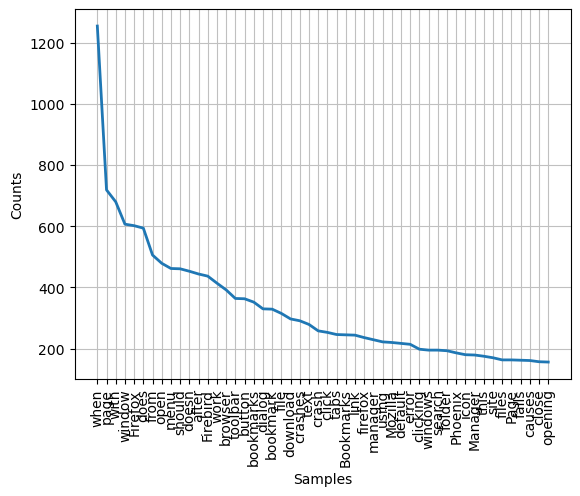

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
freqDist2 = nltk.FreqDist(largewords)
freqDist2.plot(50)

**The word "when" is the most frequent word in this corpus. If we want to remove it, we can do so. "When" is not removed after removing stop words because it is not a stop word. "When" does not indicate whether a review or comment is positive, negative, or neutral. Therefore, removing the word "when" is beneficial because it occurs approximately 1200 times in the corpus. If we remove "when," the model will be relieved of having to perform 1200 calculations. This will speed up the model.**

**After removing stop words, this problem will not arise because punctuation marks and stop words are repeated most of the time.**

# Word Cloud

A word cloud is a visual representation of different words. It shows the prevalence (popularity) of words in a corpus.

In [44]:
from wordcloud import WordCloud

myWordCloud = WordCloud().generate_from_frequencies(freqDist2)

# The generate_from_frequencies() method is a way to generate a word cloud. It shows words as large as their frequencies.

(-0.5, 399.5, 199.5, -0.5)

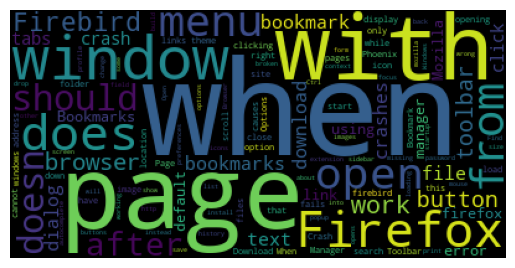

In [45]:
import matplotlib.pyplot as plt

plt.imshow(myWordCloud)
plt.axis('off')

**We can adjust the size of a word cloud if we want.**

**Large words tend to repeat more often in a corpus, while small words tend to repeat less often.**

**In sentiment analysis projects, we create word clouds for positive and negative words. We create separate word clouds for positive and negative words. In sentiment analysis, we have a training dataset. First, we create a word cloud of positive reviews and then a word cloud of negative reviews. We check which words are highly repeated in both positive and negative reviews. In positive reviews, which positive words are repeated the most? In negative reviews, which negative words are used the most? By doing this, we get an idea of the most commonly used positive and negative words.** 

In [46]:
# Try: Remove stop words and then build the Word Cloud

In [47]:
# Text Preprocessing Pipeline

def preprocessText(myText):
    tweet = myText.lower()  # Convert the text to lowercase    
    
    tweet = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)  # Replace URL's with "URL"
    
    tweet = re.sub(r'@[^\s]+', 'AT_USER', tweet)  # Replace user mentions with "AT_USER"
    
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)  # Remove special characters and digits (keep only alphabetic characters)
    
    # Tokenize the text into words and lemmatize them
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in tweet.split()]

    # Remove stopwords and join the lemmatized words back into a single string
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    preprocessed_tweet = ' '.join(filtered_words)

    return preprocessed_tweet

**In companies, we will make codes like this. We do multiple things in a single code. In code, we create a user-defined function to perform multiple things.**

In [48]:
# Example 

myText = "This is an example tweet with a URL https://example.com and a user mention @user123!"
myText

'This is an example tweet with a URL https://example.com and a user mention @user123!'

In [49]:
preprocessText(myText)

'example tweet url URL user mention AT USER'